# Deskripsi Datasets Pneumonia
**Dataset disusun dalam 3 folder (train, test, val) dan berisi subfolder untuk setiap kategori gambar (Pneumonia/Normal). Terdapat 5.863 gambar X-Ray (JPEG) dan 2 kategori (Pneumonia/Normal). Gambar rontgen dada (anterior-posterior) dipilih dari kohort retrospektif pasien anak berusia satu sampai lima tahun dari Guangzhou Women and Children's Medical Center, Guangzhou. Semua pencitraan rontgen dada dilakukan sebagai bagian dari perawatan klinis rutin pasien. Untuk analisis gambar rontgen dada, semua foto rontgen dada awalnya disaring untuk kontrol kualitas dengan menghapus semua pindaian berkualitas rendah atau tidak terbaca. Diagnosis untuk gambar tersebut kemudian dinilai oleh dua dokter ahli sebelum diizinkan untuk melatih sistem AI. Untuk memperhitungkan kesalahan penilaian, set evaluasi juga diperiksa oleh ahli.**

# Import library yang dibutuhkan 

In [ ]:
# Import module yang dibutuhkan
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, Callback
from tensorflow.keras.preprocessing import image
from PIL import Image

from sklearn.metrics import classification_report,confusion_matrix
from glob import glob
import os
import pandas as pd
import seaborn as sns
import pickle
import numpy as np
import matplotlib.pyplot as plt

#bokeh
from bokeh.models import ColumnDataSource, HoverTool, Panel, FactorRange
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.palettes import Spectral6

import warnings
warnings.filterwarnings("ignore")

# Load datasets

In [ ]:
# Mount Drive dilakukan untuk mengakses dataset yang tersimpan digoogle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Deklarasi path atau jalur datasets yang tersimpan didalam folder google drive
base_dir = "/content/drive/MyDrive/PROYEK AKHIR MACHINE LEARNING KELAS 12/KELOMPOK-1/pneumonia_chest_xray_datasets"
train_dir = os.path.join(base_dir, "train/")
test_dir = os.path.join(base_dir, "test/")
val_dir = os.path.join(base_dir, "val/")

In [ ]:
# sHitung datasets
print("Number of images in Train is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))

Number of images in Train is 5226
Number of images in Test is 624
Number of images in Validation is 16


In [ ]:
# Grafik distribusi jumlah datasets setiap kelas
Categories = ["Train", "Test", "Validation"]
Subcategories = ['Normal', 'Pneumonia']

Train = []
Test = []
Validation = []

pneu_train = len(glob(train_dir + "/PNEUMONIA/*"))
normal_train = len(glob(train_dir + "/NORMAL/*"))
pneu_test = len(glob(test_dir + "/PNEUMONIA/*"))
normal_test = len(glob(test_dir + "/NORMAL/*"))
pneu_val = len(glob(val_dir + "/PNEUMONIA/*"))
normal_val = len(glob(val_dir + "/NORMAL/*"))

Train.append(normal_train)
Train.append(pneu_test)
Test.append(pneu_train)
Test.append(normal_val)
Validation.append(normal_test)
Validation.append(pneu_val)
print(Train)
print(Test)
print(Validation)

data = {'Categories':Categories,
        'Train':Train,
        'Test':Test,
        'Validation':Validation}

x = [(categories, subcategories) for categories in Categories for subcategories in Subcategories]
counts = sum(zip(data['Train'], data['Test'], data['Validation']), ())

source = ColumnDataSource(data=dict(x=x, counts=counts, color=Spectral6))

p = figure(x_range=FactorRange(*x), plot_height=400, plot_width=800, title="Distribution of images with different category",
           tools="hover, pan, box_zoom, wheel_zoom, reset, save", tooltips= ("@x: @counts"))

p.vbar(x='x', top='counts', width=0.9, color='color', legend_field="x", source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"
output_notebook()
show(p)

[1341, 390]
[3875, 8]
[234, 8]


# Visualisasi data

['/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0509-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0509-0001-0002.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0519-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0514-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0512-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0511-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0510-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0515-0001.jpeg', '/content/drive/MyDrive/PROYEK_ML_KELOMPOK_1/pneumonia_chest_xray_datasets/train/NORMAL/IM-0525-0001-0001.jpeg', '/content/drive/M

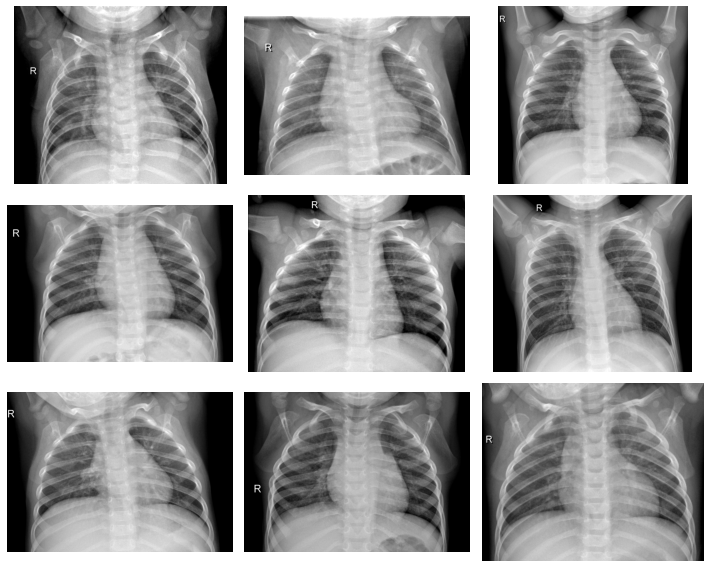

In [ ]:
# Ekstrak 9 gambar untuk kelas normal
Normal = glob(train_dir + "NORMAL/*")
print(Normal)
random_images = [Normal[i] for i in range(9)]

print('Display Normal Images')

# Adjust ukuran gambar
plt.figure(figsize=(10,8))

# Menampilkan 9 gambar
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters untuk memberikan padding
plt.tight_layout()  

Display Pneumonia Images


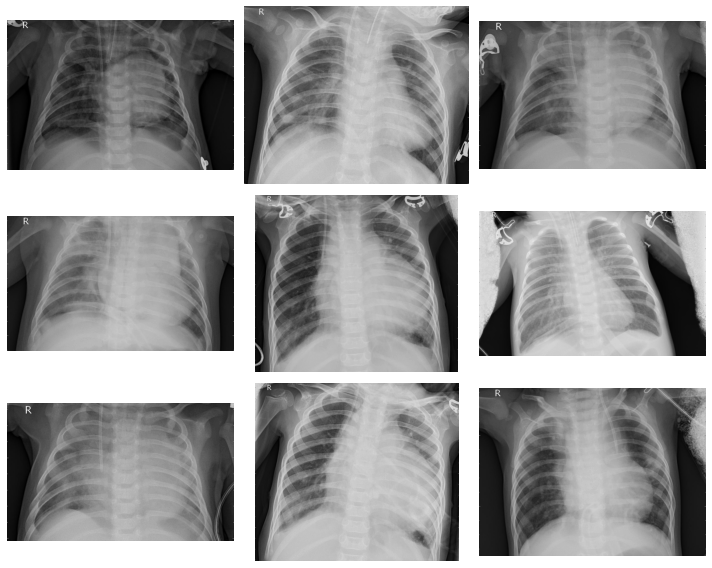

In [ ]:
# Ekstrak 9 gambar untuk kelas Pneumonia
Pneumonia = glob(test_dir + "PNEUMONIA/*")
random_images = [Pneumonia[i] for i in range(9)]

print('Display Pneumonia Images')

# Adjust ukuran gambar
plt.figure(figsize=(10,8))

# Menampilkan 9 gambar
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(random_images[i])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters untuk memberikan padding
plt.tight_layout()  

# Augmentasi Data
**Untuk menghindari masalah overfitting. Kami membuat kumpulan data yang ada menjadi lebih besar dengan mengubah data training dengan transformasi kecil untuk mereproduksi variasi. Pendekatan yang mengubah data training dengan cara yang mengubah representasi array sambil mempertahankan label yang sama dikenal sebagai teknik augmentasi data. Beberapa augmentasi populer yang digunakan orang adalah grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, dan banyak lagi. Dengan menerapkan hanya beberapa transformasi ini ke data training kami, kami dapat dengan mudah menggandakan atau melipatgandakan jumlah contoh training dan membuat model yang sangat kuat.**

In [ ]:
# Menggunakan ImageDataGenerator untuk meload gambar untuk Training dan Testing model
batch_size = 16
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=train_dir,
                                                     target_size=(300, 300),
                                                     batch_size = batch_size,
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255
                               ).flow_from_directory(directory=val_dir,
                                                     target_size=(300, 300),
                                                     batch_size = batch_size,
                                                     ),
    "test": ImageDataGenerator(rescale=1 / 255
                               ).flow_from_directory(directory=test_dir,
                                                     target_size=(300, 300),
                                                     batch_size = batch_size,
                                                     ),
}

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Untuk augmentasi data, saya memilih untuk:

1.  Putar beberapa gambar training secara acak sebesar 30 derajat
2.  Perbesar secara acak sebesar 20% beberapa gambar training
3.  Menggeser gambar secara horizontal secara acak sebesar 10% dari lebarnya
4.  Menggeser gambar secara vertikal sebanyak 10% dari ketinggian secara acak
5.  Balik gambar secara acak secara horizontal.


In [ ]:
# Mendownload weight inception model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

# Inisialisasi InceptionV3 (sebelum training) model dengan ukuran gambar sebagai (300, 300, 3)
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))

# meload Weights dari Model InceptionV3 
base_model.load_weights('/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Setting Training semua layer InceptionV3 model menjadi false
base_model.trainable = False

--2022-12-06 05:45:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  18.5MB/s    in 5.8s    

2022-12-06 05:46:05 (14.4 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
# menambahkan beberapa layer didalam model sesuai yang dibutuhkan
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax') # 2 Output Neurons untuk 2 kelas
])

In [ ]:
# Menggunakan Adam Optimizer dan menentukan learning rate model
opt = optimizers.Adam(learning_rate=0.0001)

# Mengkompile dan setting parameters yang akan digunakan didalam model
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [ ]:
# Melihat rangkuman model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 2)                 2050      
                                                                 
Total params: 23,903,010
Trainable params: 2,100,226
Non-trainable params: 21,802,784
____________________________________

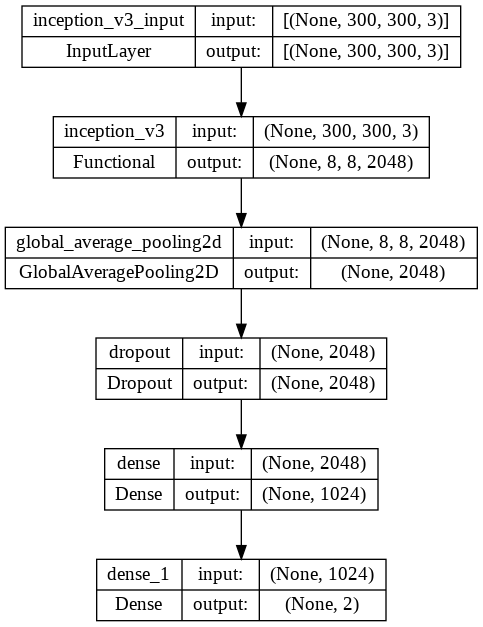

In [ ]:
# Melihat plot model
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Setting variables untuk model
epochs = 10

# Membagi Training, validation dan  Testing Data
training_set = datagenerator["train"]
val_set = datagenerator["valid"]
test_set = datagenerator["test"]

# Menghitung variable untuk model
steps_per_epoch = training_set.n // batch_size
validation_steps = val_set.n // batch_size


print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 326
validation_steps : 1


# Training model

In [ ]:
# File Path untuk menyimpan model
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Menggunakan ModelCheckpoint function untuk melatih dan menyimpan model yang lebih baik dari sebelumnya
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training model
history = model.fit_generator(generator=training_set, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=val_set, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
326/326 [==============================] - ETA: 0s - loss: 0.2250 - accuracy: 0.9061 
Epoch 1: val_accuracy improved from -inf to 0.87500, saving model to ./model_01-0.88.h5
326/326 [==============================] - 3656s 11s/step - loss: 0.2250 - accuracy: 0.9061 - val_loss: 0.3224 - val_accuracy: 0.8750
Epoch 2/10
326/326 [==============================] - ETA: 0s - loss: 0.1677 - accuracy: 0.9375
Epoch 2: val_accuracy did not improve from 0.87500
326/326 [==============================] - 152s 466ms/step - loss: 0.1677 - accuracy: 0.9375 - val_loss: 0.3319 - val_accuracy: 0.8125
Epoch 3/10
326/326 [==============================] - ETA: 0s - loss: 0.1512 - accuracy: 0.9398
Epoch 3: val_accuracy did not improve from 0.87500
326/326 [==============================] - 156s 480ms/step - loss: 0.1512 - accuracy: 0.9398 - val_loss: 0.2453 - val_accuracy: 0.8750
Epoch 4/10
326/326 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9375
Epoch 4: val_accuracy

# Evaluasi model

In [ ]:
# Load best model
import os
acc = []
file = os.listdir('/content')
for x in file:
  if x[14:] == "h5":
    acc.append(x)

from keras.models import load_model
print("Model yang digunakan:", max(acc))
model = load_model(max(acc))

Model yang digunakan: model_04-0.94.h5


In [ ]:
# Menghitung Loss dan Accuracy model
test_loss, test_acc = model.evaluate(test_set)
print(f"Accuracy of the model test is: {round(test_acc*100, 2)} %")
print(f"Loss of the model test is: {round(test_loss, 2)}")

39/39 [==============================] - 179s 5s/step - loss: 0.3396 - accuracy: 0.8542
Accuracy of the model test is: 85.42 %
Loss of the model test is: 0.34


# Visualisasi evaluasi model

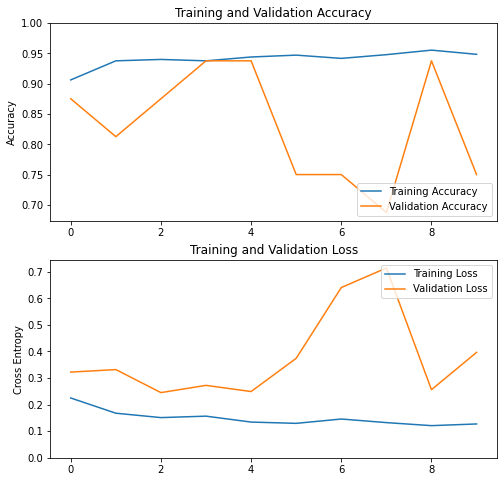

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------
# Menampikan grafik training dan validation accuracy 
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------
# Menampikan grafik training dan validation loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Confution Matrix and Classification Report
predicted_vals = model.predict(test_set, steps=len(test_set))
predicted_vals = np.argmax(predicted_vals, axis=1)
print(confusion_matrix(test_set.classes, predicted_vals))

39/39 [==============================] - 8s 185ms/step
[[ 88 146]
 [123 267]]


Confusion matrix


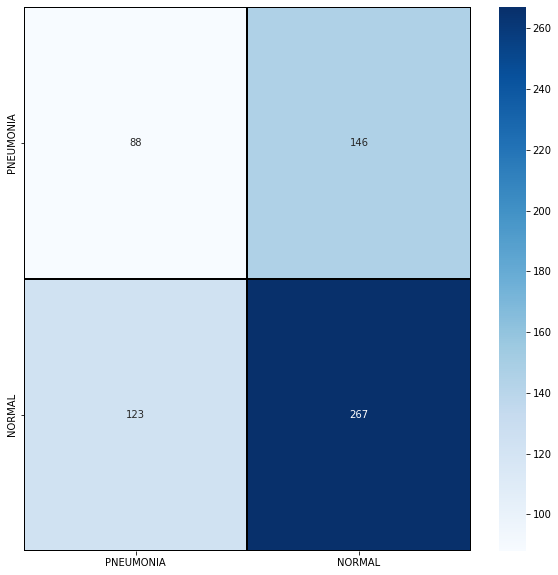

In [ ]:
print('Confusion matrix')
labels = ["PNEUMONIA", "NORMAL"]
cm = confusion_matrix(test_set.classes, predicted_vals > 0.5)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='', xticklabels = labels, yticklabels = labels)

# Testing model

In [ ]:
# Fungsi kustom untuk melihat prediksi dengan inputan gambar
def predict(img_rel_path):
  
    # Import gambar dari path dengan ukuran gambar (300, 300)
    img = image.load_img(img_rel_path, target_size=(300, 300))

    # Konversi gambar menjadi array
    img = image.img_to_array(img, dtype=np.uint8)

    # Penskalaan gambar dengan nilai antara 0 dan 1
    img = np.array(img)/255.0

    # Menampilkan gambar yang di import
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Mendapatkan prediksi dari gambar yang diimport
    p = model.predict(img[np.newaxis, ...])

    # Deklarasi label
    labels = {0: 'Normal', 1: 'Pneumonia'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    # Perulangan untuk menghitung probabilitas testing
    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
    
    # Function menampilkan diagram probabilitas tiap kelas
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

# Testing kelas Normal

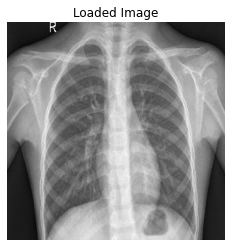

1/1 [==============================] - 2s 2s/step


Maximum Probability:  0.9707136
Classified: Normal 



-------------------Individual Probability--------------------------------

NORMAL : 97.07 %
PNEUMONIA : 2.93 %


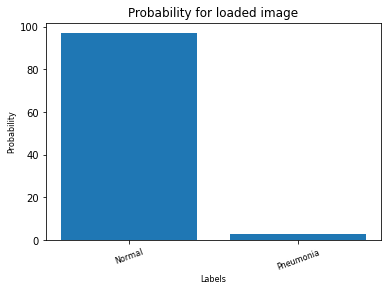

In [ ]:
# Memanggil fungsi dengan parameter jalur dimana gambar disimpan
predict("/content/drive/MyDrive/PROYEK AKHIR MACHINE LEARNING KELAS 12/KELOMPOK-1/pneumonia_chest_xray_datasets/test/NORMAL/IM-0001-0001.jpeg")

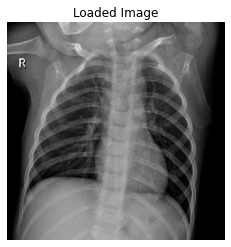

1/1 [==============================] - 0s 25ms/step


Maximum Probability:  0.9888465
Classified: Normal 



-------------------Individual Probability--------------------------------

NORMAL : 98.88 %
PNEUMONIA : 1.12 %


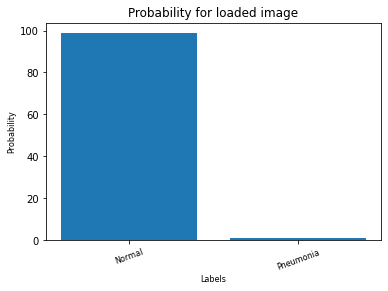

In [ ]:
# Memanggil fungsi dengan parameter jalur dimana gambar disimpan
predict("/content/drive/MyDrive/PROYEK AKHIR MACHINE LEARNING KELAS 12/KELOMPOK-1/pneumonia_chest_xray_datasets/val/NORMAL/NORMAL2-IM-1442-0001.jpeg")

# Testing kelas Pneumonia

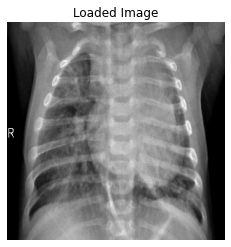

1/1 [==============================] - 0s 26ms/step


Maximum Probability:  0.8812958
Classified: Pneumonia 



-------------------Individual Probability--------------------------------

NORMAL : 11.87 %
PNEUMONIA : 88.13 %


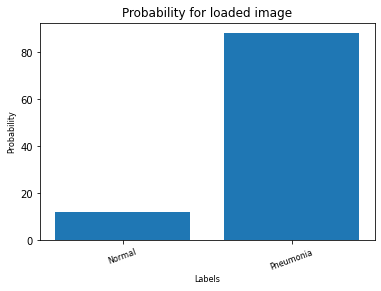

In [ ]:
# Memanggil fungsi dengan parameter jalur dimana gambar disimpan
predict("/content/drive/MyDrive/PROYEK AKHIR MACHINE LEARNING KELAS 12/KELOMPOK-1/pneumonia_chest_xray_datasets/test/PNEUMONIA/person100_bacteria_475.jpeg")

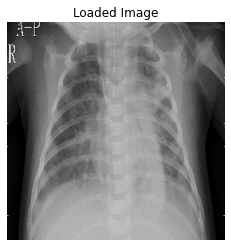

1/1 [==============================] - 0s 26ms/step


Maximum Probability:  0.981177
Classified: Pneumonia 



-------------------Individual Probability--------------------------------

NORMAL : 1.88 %
PNEUMONIA : 98.12 %


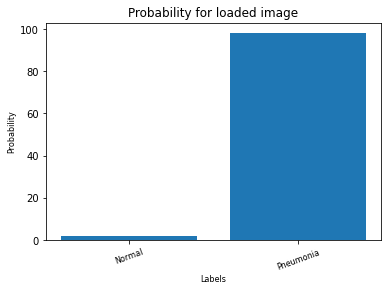

In [ ]:
# Memanggil fungsi dengan parameter jalur dimana gambar disimpan
predict("/content/drive/MyDrive/PROYEK AKHIR MACHINE LEARNING KELAS 12/KELOMPOK-1/pneumonia_chest_xray_datasets/val/PNEUMONIA/person1946_bacteria_4874.jpeg")